## Чтение данных

In [1]:
import pandas as pd
df = pd.read_csv('heart_2022_no_nans.csv')
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


## Обработка данных

Удалим дубликаты

In [2]:
print(df.duplicated().any())
df = df.drop_duplicates()
df.duplicated().any()

True


False

<AxesSubplot:>

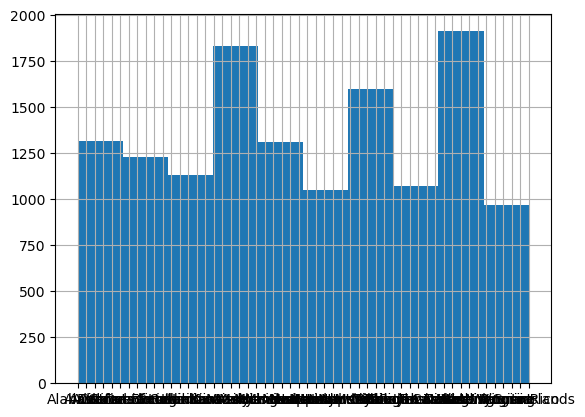

In [3]:
df[df['HadHeartAttack'] == 'Yes']['State'].hist()

Возможно, штат как-то и влияет на вероятность сердечного приступа, но мы пока что его выкинем, потому что делать one-hot-encoding категориальной переменной с 54 значениями как-то не хочется. Если качество будет плохим, можно будет попробовать добавить бинарную фичу, отвечающую за принадлежность к топ-3 штатам по количеству сердечных приступов

In [ ]:
df = df.drop(columns=['State'])

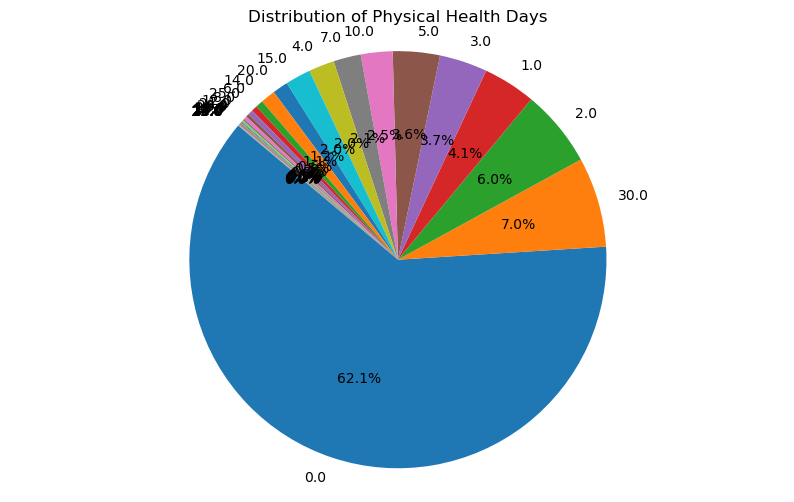

In [4]:
import matplotlib.pyplot as plt
physical_health_counts = df['PhysicalHealthDays'].value_counts()

plt.figure(figsize=(10, 6))
plt.pie(physical_health_counts, labels=physical_health_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Physical Health Days')
plt.axis('equal') 
plt.show()

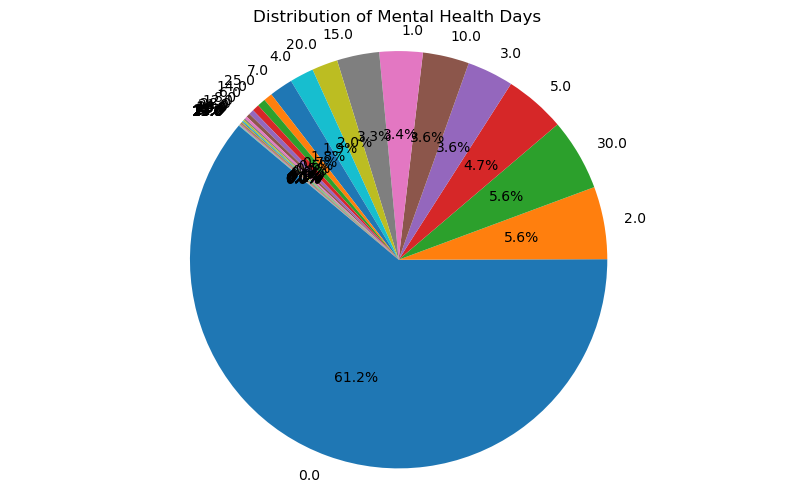

In [5]:
import matplotlib.pyplot as plt
mental_health_counts = df['MentalHealthDays'].value_counts()

plt.figure(figsize=(10, 6))
plt.pie(mental_health_counts, labels=mental_health_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Mental Health Days')
plt.axis('equal') 
plt.show()

Не очень понятно, за что отвечают эти фичи, да и распрелеление у них сомнительное. Поэтому логично их выбросить.

In [ ]:
df = df.drop(columns=['PhysicalHealthDays', 'MentalHealthDays'])

Числовые фичи нужно нормализовать

Значения GeneralHealth имеют внутренний порядок, поэтому лучше закодировать их целыми числами, чем применять one-hot-encoding. То же самое касается фичей LastCheckupTime, AgeCategory и RemovedTeeth

In [7]:
df['GeneralHealth'].unique()

array(['Very good', 'Fair', 'Good', 'Excellent', 'Poor'], dtype=object)

In [8]:
df['GeneralHealth'] = df['GeneralHealth'].map({
    "Poor" : 0,
    "Good" : 1,
    "Very good" : 2,
    "Fair" : 3,
    "Excellent" : 4
})


In [9]:
df['LastCheckupTime'].unique()

array(['Within past year (anytime less than 12 months ago)',
       '5 or more years ago',
       'Within past 2 years (1 year but less than 2 years ago)',
       'Within past 5 years (2 years but less than 5 years ago)'],
      dtype=object)

In [10]:
df['LastCheckupTime'] = df['LastCheckupTime'].map({
    'Within past year (anytime less than 12 months ago)' : 0,
    'Within past 2 years (1 year but less than 2 years ago)' : 1,
    'Within past 5 years (2 years but less than 5 years ago)' : 2,
    '5 or more years ago' : 3
})

In [11]:
df['RemovedTeeth'].unique()

array(['None of them', '6 or more, but not all', '1 to 5', 'All'],
      dtype=object)

In [12]:
df['RemovedTeeth'] = df['RemovedTeeth'].map({
    'None of them' : 0,
    '1 to 5' : 1,
    '6 or more, but not all' : 2,
    'All' : 3
})

In [13]:
sorted(df['AgeCategory'].unique())

['Age 18 to 24',
 'Age 25 to 29',
 'Age 30 to 34',
 'Age 35 to 39',
 'Age 40 to 44',
 'Age 45 to 49',
 'Age 50 to 54',
 'Age 55 to 59',
 'Age 60 to 64',
 'Age 65 to 69',
 'Age 70 to 74',
 'Age 75 to 79',
 'Age 80 or older']

In [14]:
df['AgeCategory'] = df['AgeCategory'].map({
    cat : i for i, cat in enumerate(sorted(df['AgeCategory']))
})

In [15]:
numeric_cols = df.select_dtypes(include=['int', 'float']).columns
for col in numeric_cols:
    df[col] = (df[col] - df[col].mean()) / df[col].std()
df.head()

,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Female,-0.063069,-0.014163,-0.514303,-0.437113,Yes,1.373423,-0.781148,No,No,...,-0.985901,-0.560212,-0.104123,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Male,-0.063069,-0.490025,-0.514303,-0.437113,Yes,-0.708901,-0.781148,No,No,...,0.701798,0.545625,0.224400,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Male,-0.063069,-0.490025,-0.514303,-0.437113,No,0.679315,1.507534,No,No,...,1.358125,1.183895,0.459278,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Female,0.826852,0.104802,-0.514303,-0.437113,Yes,1.373423,-0.781148,No,No,...,-0.048290,0.333180,0.407083,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Female,-0.952990,-0.133129,1.336910,-0.437113,Yes,-1.403009,0.363193,No,No,...,-1.454706,-0.198634,0.675735,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


А вот фичи SmokerStatus, RaceEthnicityCategory, TetanusLast10Tdap и ECigaretteUsage можно закодировать one-hot-encoding-ом

In [16]:
df = pd.get_dummies(
    df, 
    columns=[
        'ECigaretteUsage',
        'SmokerStatus',
        'RaceEthnicityCategory',
        'TetanusLast10Tdap'
    ], 
    drop_first=True,
    dtype=float
)

Все колонки, имеющие только значения Yes/No нужно бинаризовать. Пол также стоит бинаризовать

In [17]:
for column in df.columns:
    if sorted(df[column].unique()) == ["No", "Yes"]:
        df[column] = df[column].map({
            "Yes" : 1,
            "No" : 0
        })
df['Sex'] = df['Sex'].map({
            "Male" : 1,
            "Female" : 0
        }) 
df['HadDiabetes'] = df['HadDiabetes'].map({
    'No' : 0, 
    'Yes' : 1,
    'Yes, but only during pregnancy (female)' : 1,
    'No, pre-diabetes or borderline diabetes' : 0
})
df.head()

,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,...,SmokerStatus_Current smoker - now smokes some days,SmokerStatus_Former smoker,SmokerStatus_Never smoked,RaceEthnicityCategory_Hispanic,"RaceEthnicityCategory_Multiracial, Non-Hispanic","RaceEthnicityCategory_Other race only, Non-Hispanic","RaceEthnicityCategory_White only, Non-Hispanic","TetanusLast10Tdap_Yes, received Tdap","TetanusLast10Tdap_Yes, received tetanus shot but not sure what type","TetanusLast10Tdap_Yes, received tetanus shot, but not Tdap"
0,0,-0.063069,-0.014163,-0.514303,-0.437113,1,1.373423,-0.781148,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,1,-0.063069,-0.490025,-0.514303,-0.437113,1,-0.708901,-0.781148,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1,-0.063069,-0.490025,-0.514303,-0.437113,0,0.679315,1.507534,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0,0.826852,0.104802,-0.514303,-0.437113,1,1.373423,-0.781148,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0,-0.952990,-0.133129,1.336910,-0.437113,1,-1.403009,0.363193,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [18]:
df['CovidPos'].value_counts()

No                                                               167297
Yes                                                               70324
Tested positive using home test without a health professional      8392
Name: CovidPos, dtype: int64

Колонку CovidPos тоже бинаризую. Надеюсь, что 3% отнесенных к больным с использованием домашнего теста не обидятся

In [19]:
df['CovidPos'] = df['CovidPos'].map({
    "Yes" : 1,
    "No" : 0,
    "Tested positive using home test without a health professional" : 1
})

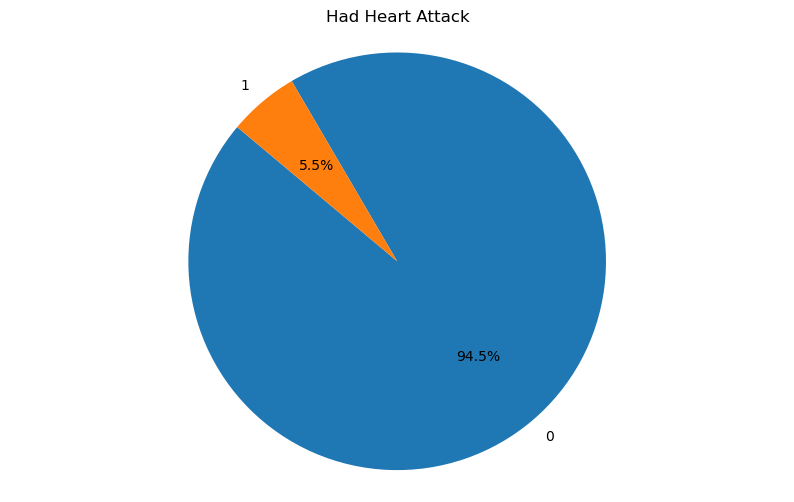

In [20]:
attack_counts = df['HadHeartAttack'].value_counts()

plt.figure(figsize=(10, 6))
plt.pie(attack_counts, labels=attack_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Had Heart Attack')
plt.axis('equal') 
plt.show()

Обрежем датасет, чтобы избавиться от дисбаланса классов

In [21]:
condition0 = (df['HadHeartAttack'] == 0)
condition1 = (df['HadHeartAttack'] == 1)
rows_to_drop = len(df[condition0]) - len(df[condition1])
indices_to_drop = df[condition0].sample(n=rows_to_drop).index
df = df.drop(indices_to_drop)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns=['HadHeartAttack']),
    df['HadHeartAttack'],
    test_size=0.1,
    stratify=df['HadHeartAttack']
)

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression


In [25]:
logreg = LogisticRegression(max_iter=10000)
logreg_fits = cross_val_score(logreg, X=df.drop(columns=['HadHeartAttack']), y=df['HadHeartAttack'], scoring='accuracy', cv=10)

In [26]:
gnb = GaussianNB()
gnb_fits = cross_val_score(gnb, X=df.drop(columns=['HadHeartAttack']), y=df['HadHeartAttack'], scoring='accuracy', cv=10)

In [ ]:
from catboost import CatBoostClassifier
cb = CatBoostClassifier()
cb_fits = cross_val_score(cb, X=df.drop(columns=['HadHeartAttack']), y=df['HadHeartAttack'], scoring='accuracy', cv=10)

In [28]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf_fits = cross_val_score(clf, X=df.drop(columns=['HadHeartAttack']), y=df['HadHeartAttack'], scoring='accuracy', cv=10)

In [29]:
from scipy.stats import ttest_ind

In [42]:
models_results = [logreg_fits, gnb_fits, cb_fits, clf_fits]
models = ['LogReg', "NB", "CatBoost", "DecisionTree"]
for i in range(4):
    for j in range(i + 1, 4):
        pvalue = ttest_ind(models_results[i], models_results[j], alternative='greater', equal_var=False).pvalue
        if pvalue < 0.01:
            print(models[i], ">", models[j], "pvalue:", pvalue)
        else:
            print(models[i], "<", models[j], "pvalue:", pvalue)

LogReg > NB pvalue: 4.6715112381953315e-05
LogReg < CatBoost pvalue: 0.9417657813064053
LogReg > DecisionTree pvalue: 4.08093100941668e-13
NB < CatBoost pvalue: 0.9999961952367017
NB > DecisionTree pvalue: 2.0936305345542623e-11
CatBoost > DecisionTree pvalue: 9.135018459959308e-14


In [32]:
models_results

[array([0.79270562, 0.79010048, 0.80312616, 0.80908076, 0.80759211,
        0.80163751, 0.80387049, 0.8087086 , 0.79791589, 0.79382211]),
 array([0.77149237, 0.77633048, 0.78265724, 0.78377373, 0.7967994 ,
        0.78377373, 0.79270562, 0.79084481, 0.78675102, 0.7770748 ]),
 array([0.79531076, 0.79382211, 0.81577968, 0.81243022, 0.8087086 ,
        0.80684779, 0.81615184, 0.80982508, 0.80796427, 0.79754373]),
 array([0.73390398, 0.71343506, 0.72534425, 0.71864533, 0.73911425,
        0.72013398, 0.73985858, 0.73836993, 0.72757722, 0.72125047])]